## "Early stage diabetes risk prediction dataset"

In [1]:
#Load necessary libraries
import numpy as np
import pandas as pd

In [2]:
#Load dataset
df = pd.read_csv("./diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
#Display top 5 rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#Describe dataset
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
df.shape

(520, 17)

In [6]:
#Checking for null values
#Result shows no null values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
#Checking for null values

df.isnull().values.any()

False

In [8]:
#Defining method to replace '?' with null value

def check(x):
    if x == '?':
        return np.NaN
    return x

In [9]:
#Applying that function to every columns

for i in range(len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].apply(check)

In [10]:
#Checking total null value in each columns

df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [11]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [12]:
# Bar Plot graph for count of patients by gender
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

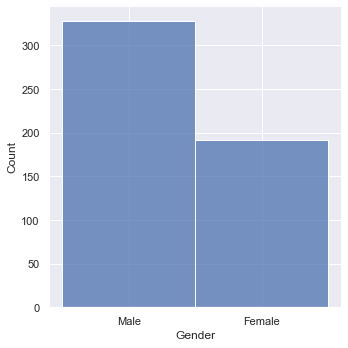

In [13]:
sns.displot(df, x="Gender",binwidth=20)

In [14]:
# Isolate positive for diabetes
positive_df=df.loc[df['class']=='Positive']
positive_df['Gender'].value_counts()

Female    173
Male      147
Name: Gender, dtype: int64

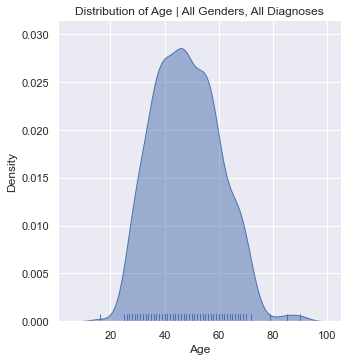

In [15]:
# Distribution of based on age as well
sns.displot(df['Age'], rug=True, kind='kde', fill=True, alpha=0.5, palette='bright')
plt.title("Distribution of Age | All Genders, All Diagnoses")
sns.despine()

Text(0.5, 1.0, 'Distribution of Age by Gender | All Diagnoses')

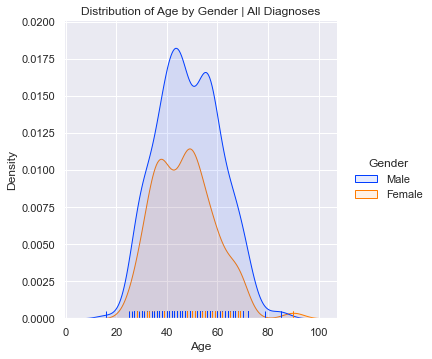

In [16]:
#Age distribution by gender as well
cols = df.columns.tolist()
genders = df['Gender'].unique()

sns.displot(x=df['Age'], hue=df['Gender'], kind='kde', fill=True, palette='bright', alpha=.1, rug=True)
plt.title("Distribution of Age by Gender | All Diagnoses")

In [17]:
# Isolate positive for diabetes
positive_df = df.loc[df['class'] == 'Positive']
print(positive_df['Gender'].value_counts())
pos_len = len(positive_df.index)
print(pos_len)

# Isolate negative for diabetes
negative_df = df.loc[df['class'] == 'Negative']
print(negative_df['Gender'].value_counts())
neg_len = len(negative_df.index)
print(neg_len)

Female    173
Male      147
Name: Gender, dtype: int64
320
Male      181
Female     19
Name: Gender, dtype: int64
200


Text(0.5, 1.0, 'Distribution of Age by Gender | Positive Diagnosis')

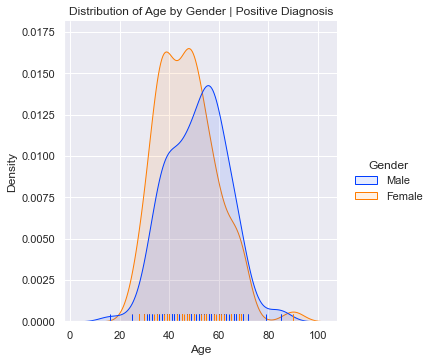

In [18]:
# Isolate positive for diabetes
positive_df = df.loc[df['class'] == 'Positive']

sns.displot(x=positive_df['Age'], kind='kde', fill=True, hue=positive_df['Gender'], alpha=.1, palette='bright', rug=True)
plt.title("Distribution of Age by Gender | Positive Diagnosis")

In [19]:
# Get a count of positive for each categorical variable
total_cols = df.columns.tolist()
total_cols.remove('Age')
total_cols.remove('Gender')

In [20]:
# Conversion of column values into Boolean Values
def convert_to_bool(value_in):
    bool_val = None
    if str(value_in) == 'Yes':
        bool_val = True
    elif str(value_in) == 'No':
        bool_val = False
    return bool_val
    
def convert_string_to_bool(value_in, true_value, false_value):
    bool_val = None
    if str(value_in) == true_value:
        bool_val = True
    elif str(value_in) == false_value:
        bool_val = False
    return bool_val

In [21]:

df_cols = df.columns.tolist()
df_cols.remove('Age')
df_cols.remove('class')
df_cols.remove('Gender')
bool_df = df.copy()
for col in df_cols:
    bool_df[col] = bool_df[col].apply(convert_to_bool)
bool_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,False,True,False,True,False,False,False,True,False,True,False,True,True,True,Positive
1,58,Male,False,False,False,True,False,False,True,False,False,False,True,False,True,False,Positive
2,41,Male,True,False,False,True,True,False,False,True,False,True,False,True,True,False,Positive
3,45,Male,False,False,True,True,True,True,False,True,False,True,False,False,False,False,Positive
4,60,Male,True,True,True,True,True,False,True,True,True,True,True,True,True,True,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,True,True,True,False,True,False,False,True,False,True,True,False,False,False,Positive
516,48,Female,True,True,True,True,True,False,False,True,True,True,True,False,False,False,Positive
517,58,Female,True,True,True,True,True,False,True,False,False,False,True,True,False,True,Positive
518,32,Female,False,False,False,True,False,False,True,True,False,True,False,False,True,False,Negative


In [22]:
df.head().reset_index()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [23]:
total_symptom_df = bool_df.copy()
total_symptom_df = total_symptom_df.drop(['Age', 'class', 'Gender'], axis=1)
total_len = len(total_symptom_df.index)

total_symptom_df = total_symptom_df.sum().reset_index()

column_names = ['symptom', 'Value']
total_symptom_df.columns = column_names

print(total_len)
total_symptom_df['pct_reported'] = total_symptom_df['Value'] / total_len
total_symptom_df = total_symptom_df.sort_values(by=['pct_reported'], ascending=False)
print(total_symptom_df)

520
               symptom  Value  pct_reported
3             weakness    305      0.586538
0             Polyuria    258      0.496154
7              Itching    253      0.486538
9      delayed healing    239      0.459615
4           Polyphagia    237      0.455769
1           Polydipsia    233      0.448077
6      visual blurring    233      0.448077
10     partial paresis    224      0.430769
2   sudden weight loss    217      0.417308
11    muscle stiffness    195      0.375000
12            Alopecia    179      0.344231
8         Irritability    126      0.242308
5       Genital thrush    116      0.223077
13             Obesity     88      0.169231


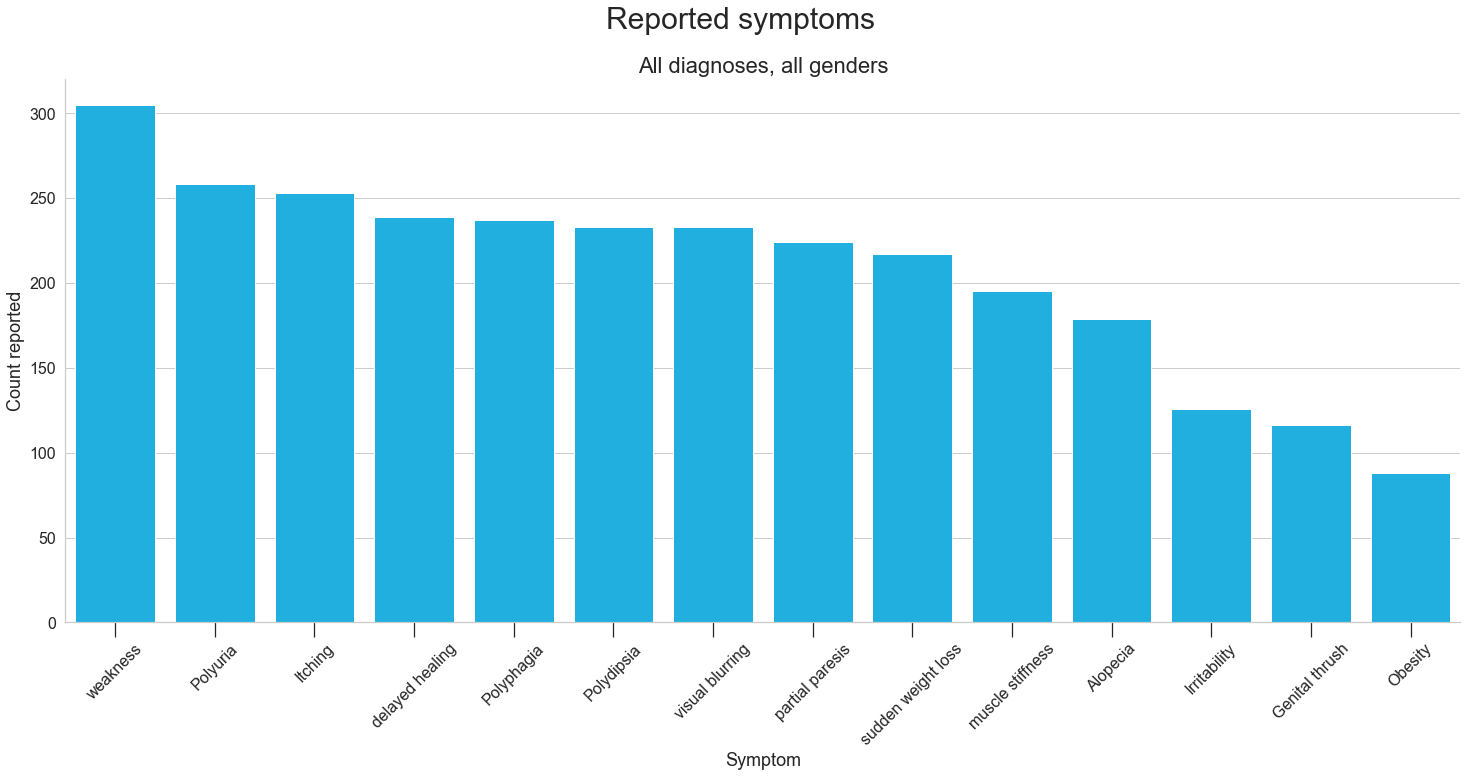

In [24]:
# Graph to plot reported symptoms based on all genders

sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=total_symptom_df, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes)
#sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

axes.set_xlabel("Symptom", fontsize=18)
axes.set_ylabel("Count reported",fontsize=18)
axes.tick_params(labelsize=16)
axes.set_title('All diagnoses, all genders', size=22)
axes.tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
axes.tick_params('x', labelrotation=45)
    
fig.suptitle('Reported symptoms', size=30)
sns.despine()

   Age Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40   Male     False        True               False      True       False   
1   58   Male     False       False               False      True       False   
2   41   Male      True       False               False      True        True   
3   45   Male     False       False                True      True        True   
4   60   Male      True        True                True      True        True   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0           False            False     True         False             True   
1           False             True    False         False            False   
2           False            False     True         False             True   
3            True            False     True         False             True   
4           False             True     True          True             True   

   partial paresis  muscle stiffness  Alopec

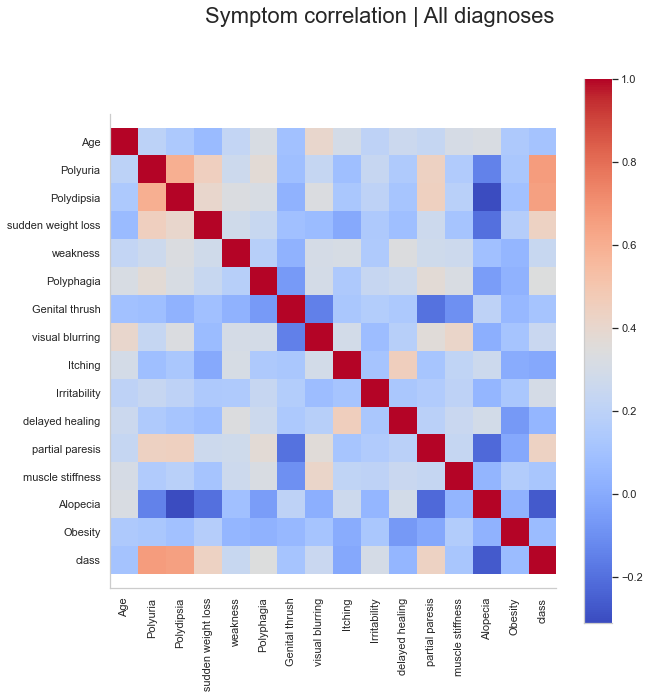

In [25]:
# Correlation of symptoms
corr_df = bool_df.copy()
corr_df['class'] = corr_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1
)

print(corr_df.head())
# corr_df = corr_df.drop('Age', axis=1)
print(corr_df.info())
corr_df = corr_df.corr()
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(10,10), sharey=True)
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='coolwarm', ax=axes, square=True)
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
fig.suptitle('Symptom correlation | All diagnoses', size=22)

sns.despine()

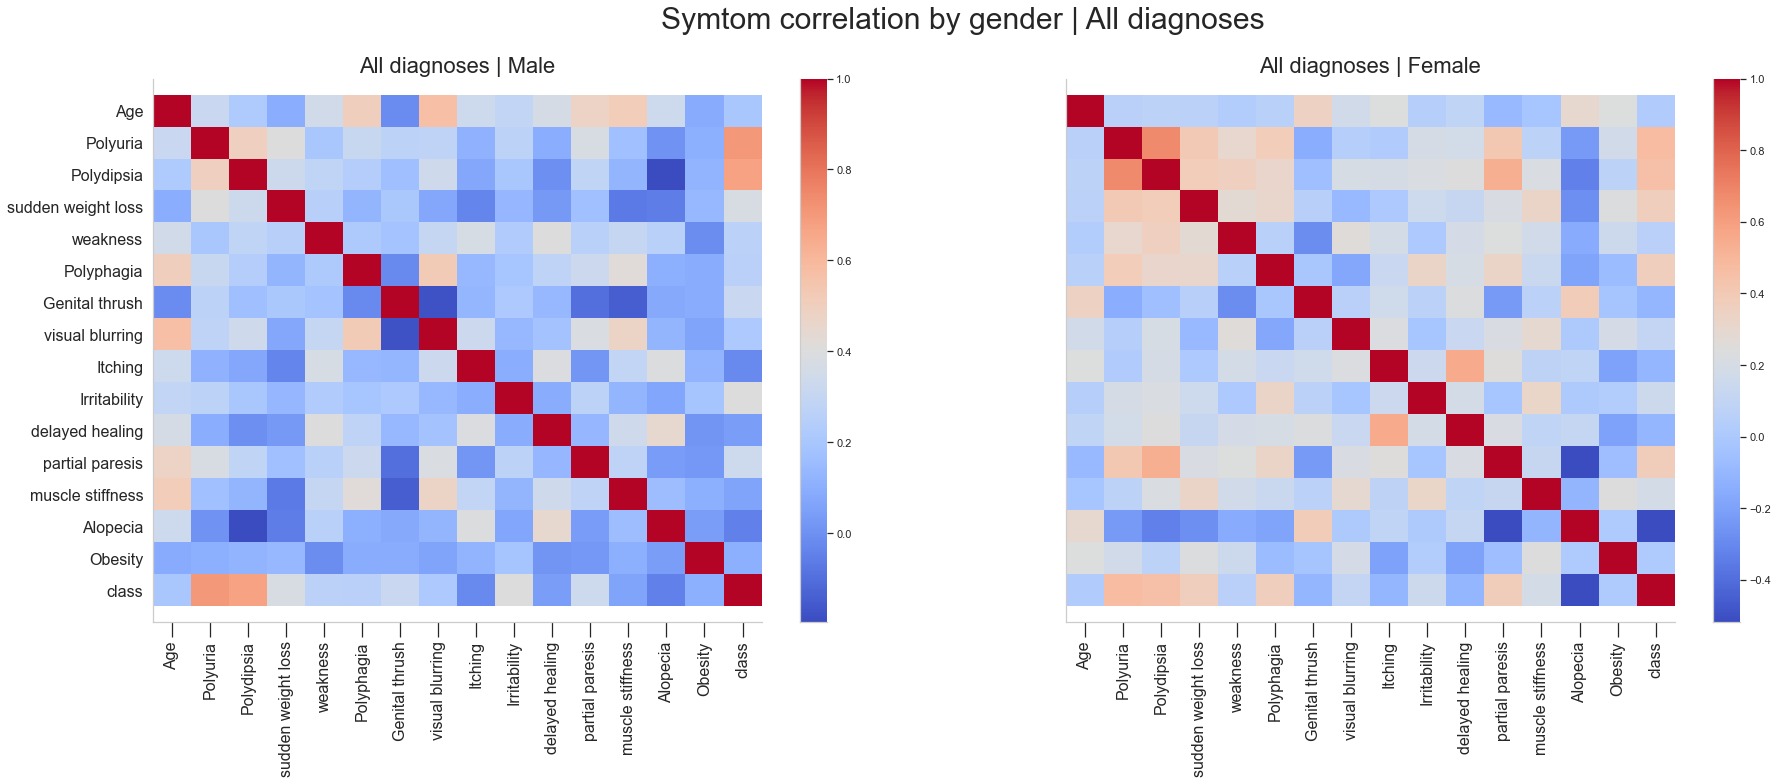

In [26]:
# HEATMAP
# SYMPTOMS BY GENDER
heatmap_pos_dfs = bool_df.copy()
heatmap_pos_dfs = [heatmap_pos_dfs.loc[heatmap_pos_dfs['Gender'] == gender] for gender in genders]


sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(30,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, heatmap_pos_df in enumerate(heatmap_pos_dfs):
    current_gender = heatmap_pos_df['Gender'].iloc[0]

    heatmap_pos_df['class'] = heatmap_pos_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1)
    heatmap_pos_df = heatmap_pos_df.corr()

    sns.heatmap(heatmap_pos_df, xticklabels=heatmap_pos_df.columns, yticklabels=heatmap_pos_df.columns, cmap='coolwarm', ax=axes[x])
    # axes[x].set_xlabel("Symptom", fontsize=18)
    # axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'All diagnoses | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=90)
    bottom, top = axes[x].get_ylim()
    axes[x].set_ylim(bottom + 0.5, top - 0.5)
   
    
fig.suptitle('Symtom correlation by gender | All diagnoses', size=30)
sns.despine()

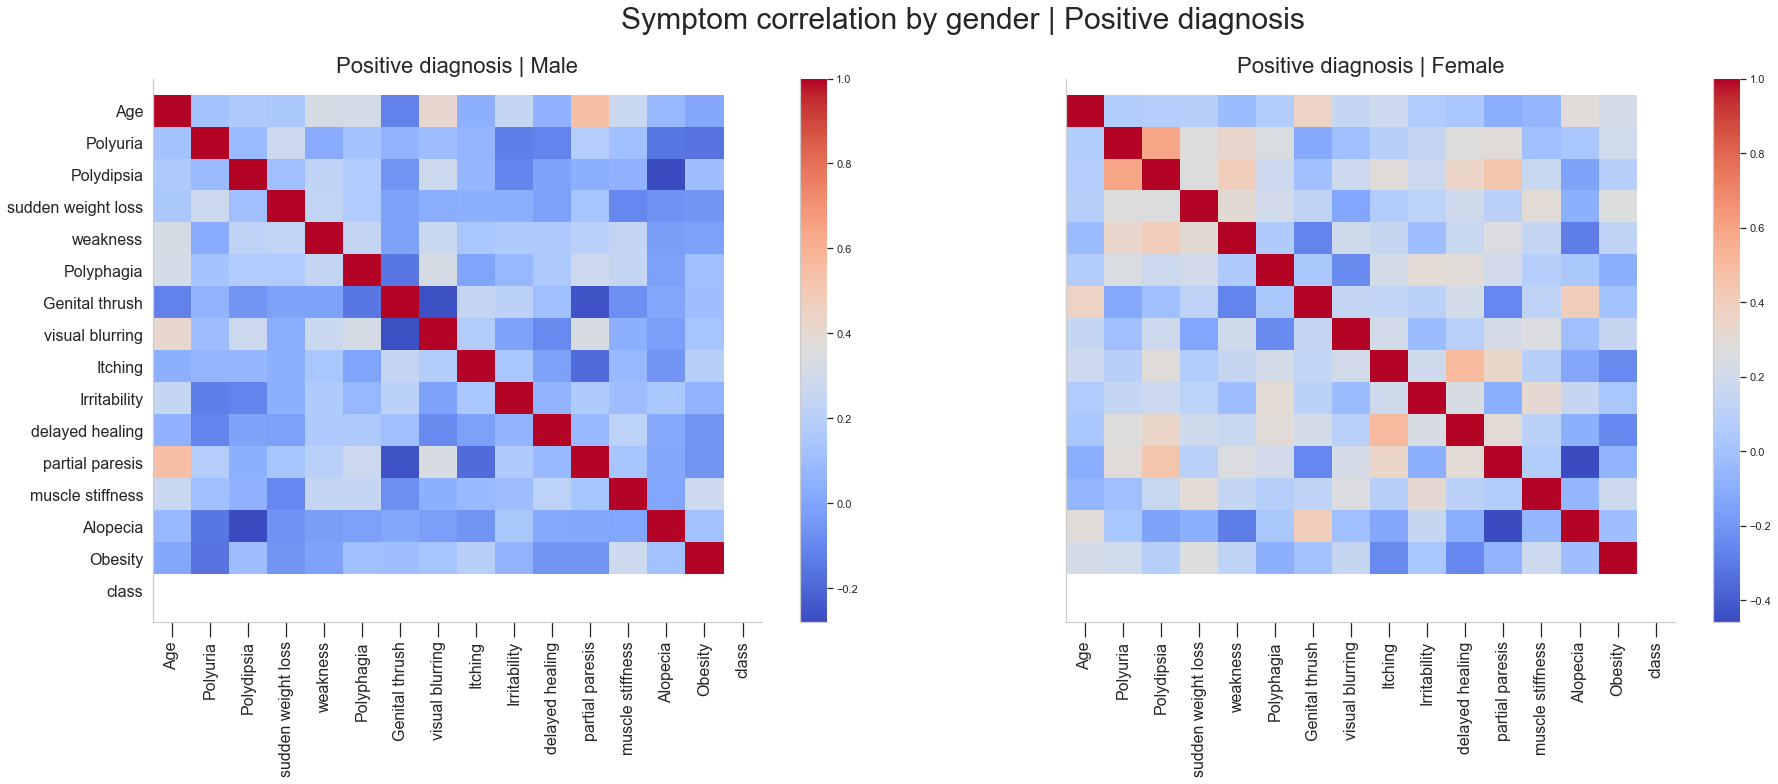

In [27]:
# HEATMAP
# POSITIVE BY GENDER
heatmap_pos_dfs = bool_df.copy()
heatmap_pos_dfs = [heatmap_pos_dfs.loc[heatmap_pos_dfs['Gender'] == gender] for gender in genders]


sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(30,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, heatmap_pos_df in enumerate(heatmap_pos_dfs):
    heatmap_pos_df = heatmap_pos_df.copy()
    heatmap_pos_df = heatmap_pos_df.loc[heatmap_pos_df['class'] == 'Positive']
    current_gender = heatmap_pos_df['Gender'].iloc[0]

    heatmap_pos_df['class'] = heatmap_pos_df[['class']].apply(
    lambda x: convert_string_to_bool(
        value_in=x['class'], 
        true_value='Positive',
        false_value='Negative'
    ),axis=1)
    heatmap_pos_df = heatmap_pos_df.corr()

    sns.heatmap(heatmap_pos_df, xticklabels=heatmap_pos_df.columns, yticklabels=heatmap_pos_df.columns, cmap='coolwarm', ax=axes[x])
    # axes[x].set_xlabel("Symptom", fontsize=18)
    # axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=90)
    bottom, top = axes[x].get_ylim()
    axes[x].set_ylim(bottom + 0.5, top - 0.5)
   
    
fig.suptitle('Symptom correlation by gender | Positive diagnosis', size=30)
sns.despine()

In [28]:
# Grouping Postive and Negative patients based on count of symptoms

sum_df_gender = bool_df.copy()
sum_df_gender = sum_df_gender.drop('Age', axis=1)

# Positive df
sum_df_gender_pos = sum_df_gender.loc[sum_df_gender['class'] == 'Positive']
# Length of positive male
sum_df_gender_pos_male_len = sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == 'Male']
sum_df_gender_pos_male_len = len(sum_df_gender_pos_male_len.index)
# Length of positive female
sum_df_gender_pos_female_len = sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == 'Female']
sum_df_gender_pos_female_len = len(sum_df_gender_pos_female_len.index)

sum_df_gender_pos = sum_df_gender_pos.groupby(['class', 'Gender']).sum().reset_index()
sum_df_gender_pos = sum_df_gender_pos.melt(id_vars=['class', 'Gender'], var_name="symptom", value_name="Value")
sum_df_gender_pos = sum_df_gender_pos.sort_values(by=['Value'], ascending=False)



# Negative df
sum_df_gender_neg = sum_df_gender.loc[sum_df_gender['class'] == 'Negative']
# Length of negative male
sum_df_gender_neg_male_len = sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == 'Male']
sum_df_gender_neg_male_len = len(sum_df_gender_neg_male_len.index)
# Length of negative female
sum_df_gender_neg_female_len = sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == 'Female']
#print(sum_df_gender_neg_female_len.head())
sum_df_gender_neg_female_len = len(sum_df_gender_neg_female_len.index)

sum_df_gender_neg = sum_df_gender_neg.groupby(['class', 'Gender']).sum().reset_index()
sum_df_gender_neg = sum_df_gender_neg.melt(id_vars=['class', 'Gender'], var_name="symptom", value_name="Value")
sum_df_gender_neg = sum_df_gender_neg.sort_values(by=['Value'], ascending=False)


pos_genders_len_list = [sum_df_gender_pos_male_len, sum_df_gender_pos_female_len]
neg_genders_len_list = [sum_df_gender_neg_male_len, sum_df_gender_neg_female_len]

print(sum_df_gender_pos.head())
print(sum_df_gender_neg)


       class  Gender             symptom  Value
0   Positive  Female            Polyuria    129
2   Positive  Female          Polydipsia    125
20  Positive  Female     partial paresis    122
6   Positive  Female            weakness    117
4   Positive  Female  sudden weight loss    114
       class  Gender             symptom  Value
25  Negative    Male            Alopecia     88
15  Negative    Male             Itching     86
7   Negative    Male            weakness     76
19  Negative    Male     delayed healing     73
23  Negative    Male    muscle stiffness     57
13  Negative    Male     visual blurring     50
9   Negative    Male          Polyphagia     47
21  Negative    Male     partial paresis     30
11  Negative    Male      Genital thrush     29
5   Negative    Male  sudden weight loss     28
27  Negative    Male             Obesity     24
17  Negative    Male        Irritability     15
1   Negative    Male            Polyuria     15
24  Negative  Female            Alopecia

In [29]:
sum_df = bool_df.copy()
sum_df = sum_df.drop('Age', axis=1)
sum_df = sum_df.groupby(['class']).sum().reset_index()
sum_df = sum_df.melt(id_vars=['class'], var_name="symptom", 
        value_name="Value")

sum_df = sum_df.sort_values(by=['Value'], ascending=False)
sum_df_pos = sum_df.loc[sum_df['class'] == 'Positive']
sum_df_neg = sum_df.loc[sum_df['class'] == 'Negative']

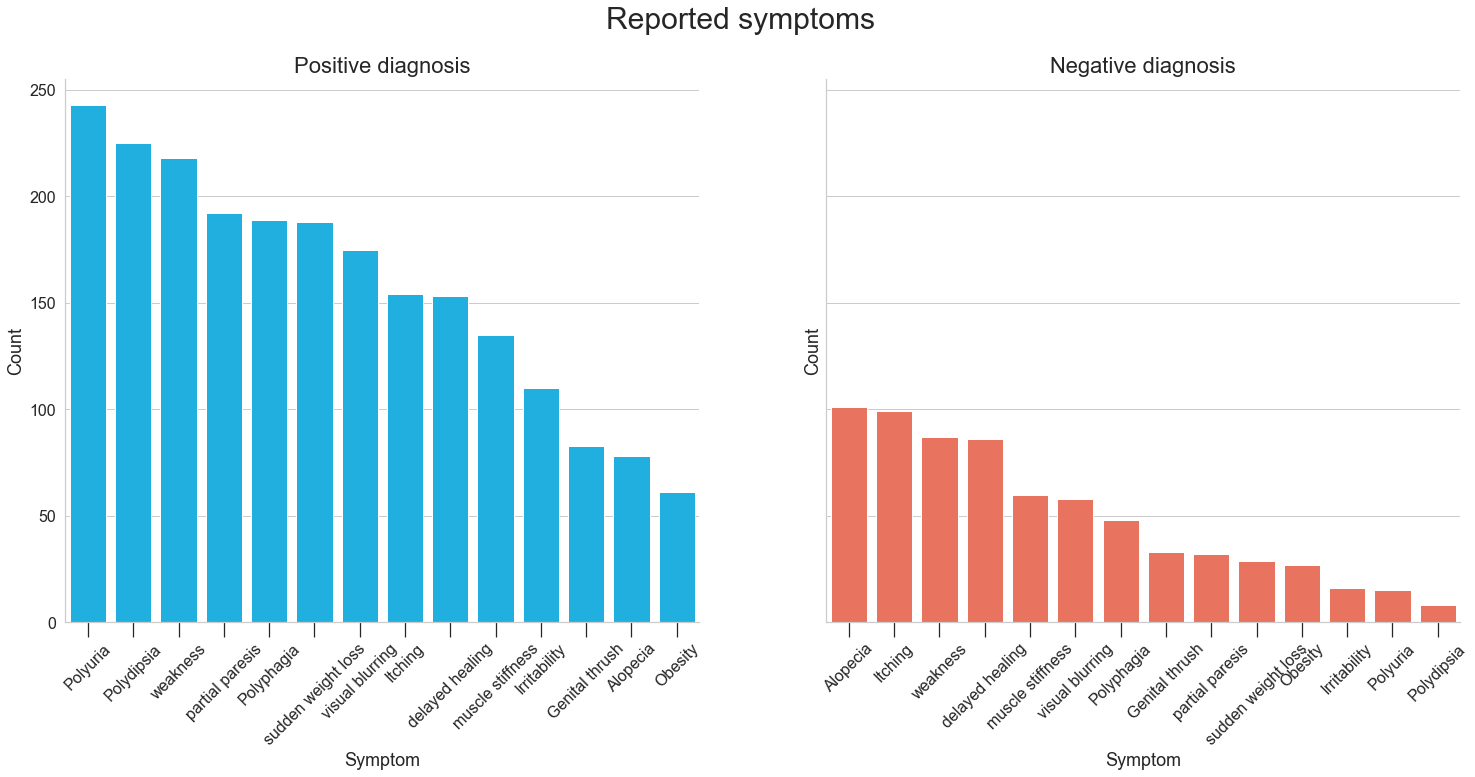

In [30]:
# Graph to plot count of patients per symptoms based on positive and negative class

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
fig.suptitle('Reported symptoms', size=30)
sns.despine()

In [31]:
# Create % reported for each symptom
print("Positive")
sum_df_pos = sum_df_pos.copy()
sum_df_pos['pct_reported'] = sum_df_pos['Value']/pos_len * 100
print(sum_df_pos.head(10))

print("Negative")
sum_df_neg = sum_df_neg.copy()
sum_df_neg['pct_reported'] = sum_df_neg['Value']/neg_len * 100
print(sum_df_neg.head(10))

Positive
       class             symptom  Value  pct_reported
1   Positive            Polyuria    243       75.9375
3   Positive          Polydipsia    225       70.3125
7   Positive            weakness    218       68.1250
21  Positive     partial paresis    192       60.0000
9   Positive          Polyphagia    189       59.0625
5   Positive  sudden weight loss    188       58.7500
13  Positive     visual blurring    175       54.6875
15  Positive             Itching    154       48.1250
19  Positive     delayed healing    153       47.8125
23  Positive    muscle stiffness    135       42.1875
Negative
       class             symptom  Value  pct_reported
24  Negative            Alopecia    101          50.5
14  Negative             Itching     99          49.5
6   Negative            weakness     87          43.5
18  Negative     delayed healing     86          43.0
22  Negative    muscle stiffness     60          30.0
12  Negative     visual blurring     58          29.0
8   Negati

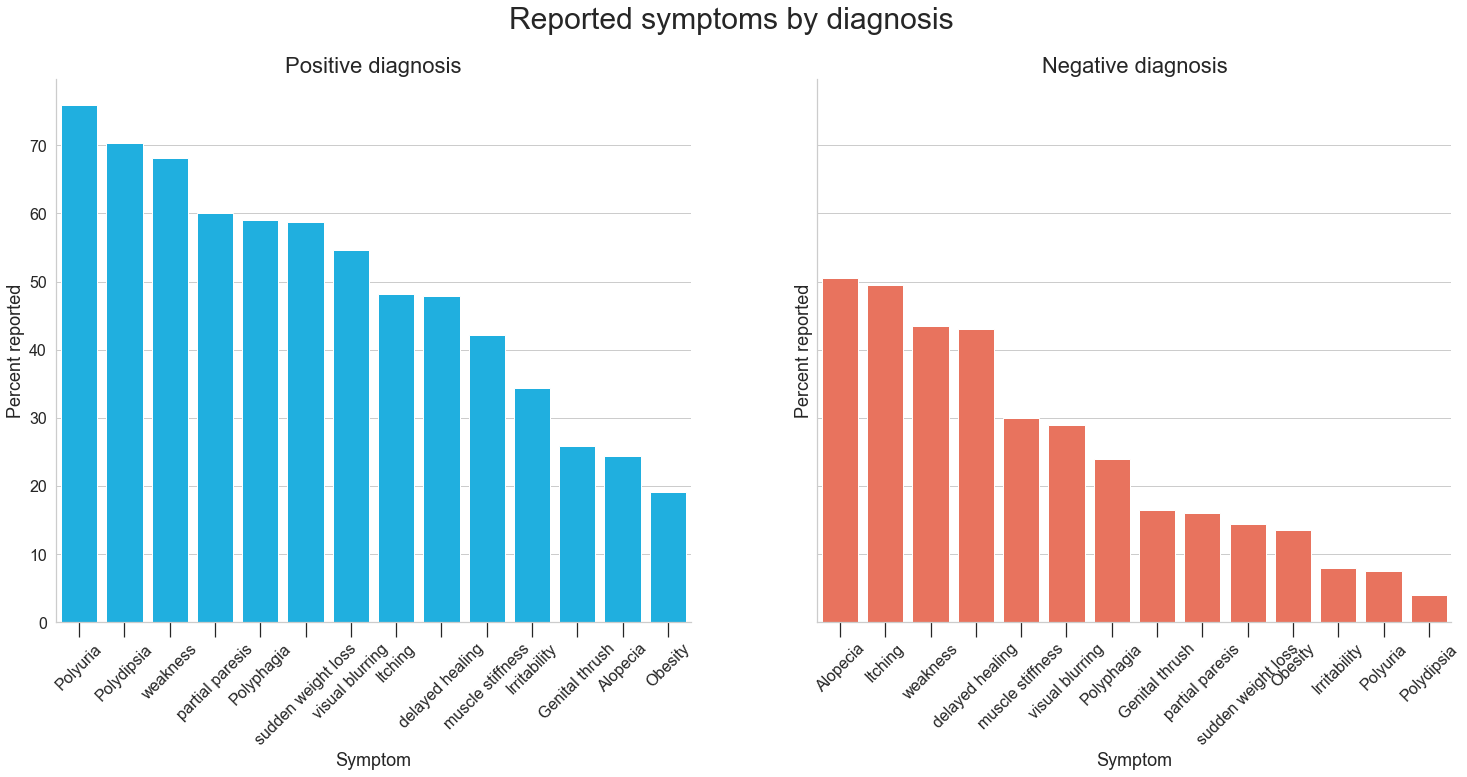

In [33]:
# Reported symptoms by diagnosis

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='pct_reported', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='pct_reported', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

left, width = .5, .5
bottom, height = .5, .45
right = left + width
top = bottom + height

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Percent reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
#     axes[x].text(right, top, 'All genders',
#         horizontalalignment='right',
#         verticalalignment='top',
#         transform=ax.transAxes)
    
fig.suptitle('Reported symptoms by diagnosis', size=30)


sns.despine()


In [34]:
# positive diagnosis df for each gender
sum_pos_genders_dfs = [sum_df_gender_pos.loc[sum_df_gender_pos['Gender'] == gender] for gender in genders]
    
# negative diagnosis df for each gender
sum_neg_genders_dfs = [sum_df_gender_neg.loc[sum_df_gender_neg['Gender'] == gender] for gender in genders]
for x, sum_neg_genders_df in enumerate(sum_neg_genders_dfs):
#     sum_neg_genders_df = sum_neg_genders_df.copy()
#     sum_neg_genders_df['pct_reported'] = sum_neg_genders_df['Value'] / neg_genders_len_list[x]
    print(neg_genders_len_list[x])
    print(sum_neg_genders_df.head())

181
       class Gender           symptom  Value
25  Negative   Male          Alopecia     88
15  Negative   Male           Itching     86
7   Negative   Male          weakness     76
19  Negative   Male   delayed healing     73
23  Negative   Male  muscle stiffness     57
19
       class  Gender          symptom  Value
24  Negative  Female         Alopecia     13
18  Negative  Female  delayed healing     13
14  Negative  Female          Itching     13
6   Negative  Female         weakness     11
12  Negative  Female  visual blurring      8


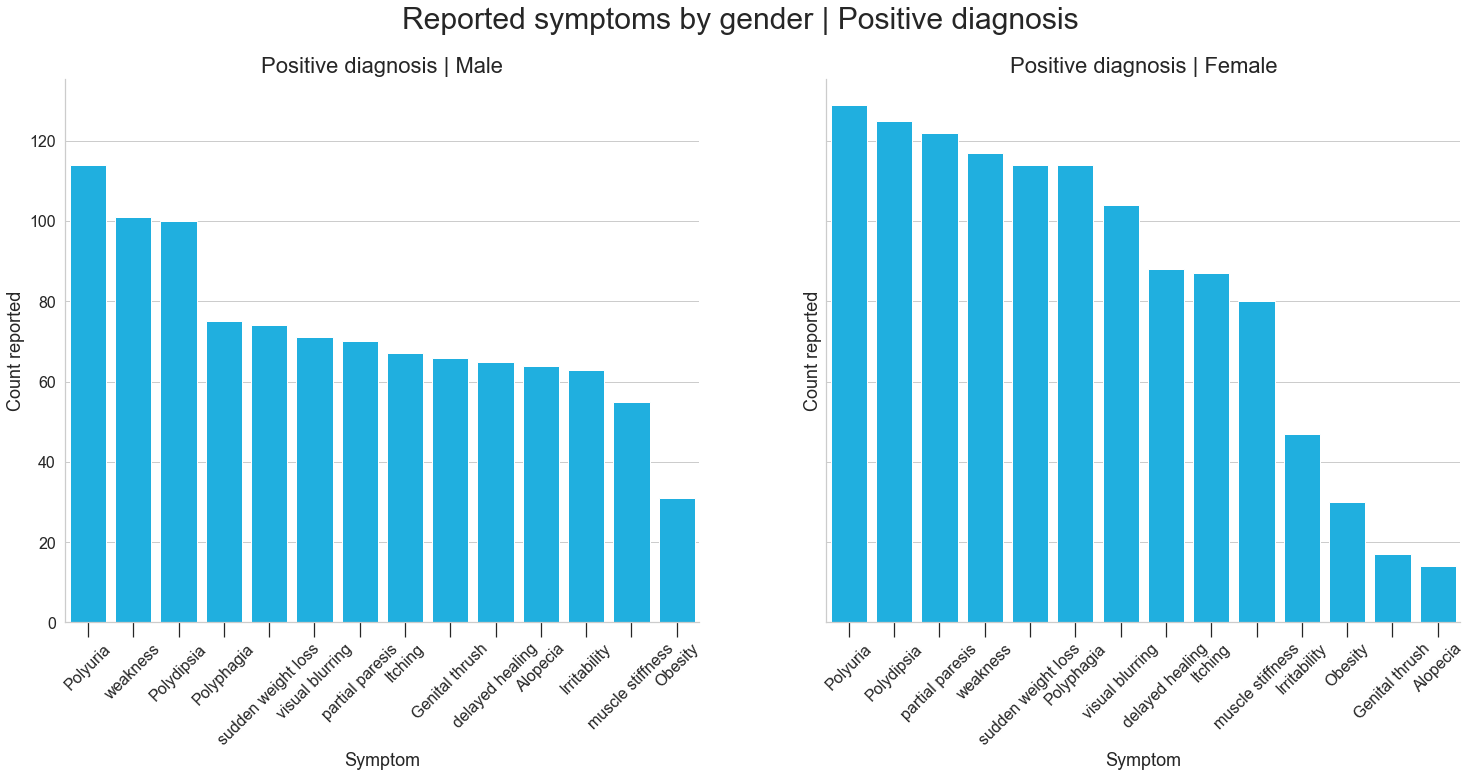

In [35]:
# Reported symotoms by Gender - Positive Diagnosis
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'deepskyblue']
for x, sum_pos_genders_df in enumerate(sum_pos_genders_dfs):
    sns.barplot(data=sum_pos_genders_df, x='symptom', y='Value', color=color_list[x], ci=False, ax=axes[x])
    current_gender = sum_pos_genders_df['Gender'].iloc[0]
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
   
    
fig.suptitle('Reported symptoms by gender | Positive diagnosis', size=30)
sns.despine()

       class Gender             symptom  Value  pct_reported
1   Positive   Male            Polyuria    114     77.551020
7   Positive   Male            weakness    101     68.707483
3   Positive   Male          Polydipsia    100     68.027211
9   Positive   Male          Polyphagia     75     51.020408
5   Positive   Male  sudden weight loss     74     50.340136
13  Positive   Male     visual blurring     71     48.299320
21  Positive   Male     partial paresis     70     47.619048
15  Positive   Male             Itching     67     45.578231
11  Positive   Male      Genital thrush     66     44.897959
19  Positive   Male     delayed healing     65     44.217687
25  Positive   Male            Alopecia     64     43.537415
17  Positive   Male        Irritability     63     42.857143
23  Positive   Male    muscle stiffness     55     37.414966
27  Positive   Male             Obesity     31     21.088435
       class  Gender             symptom  Value  pct_reported
0   Positive  Female   

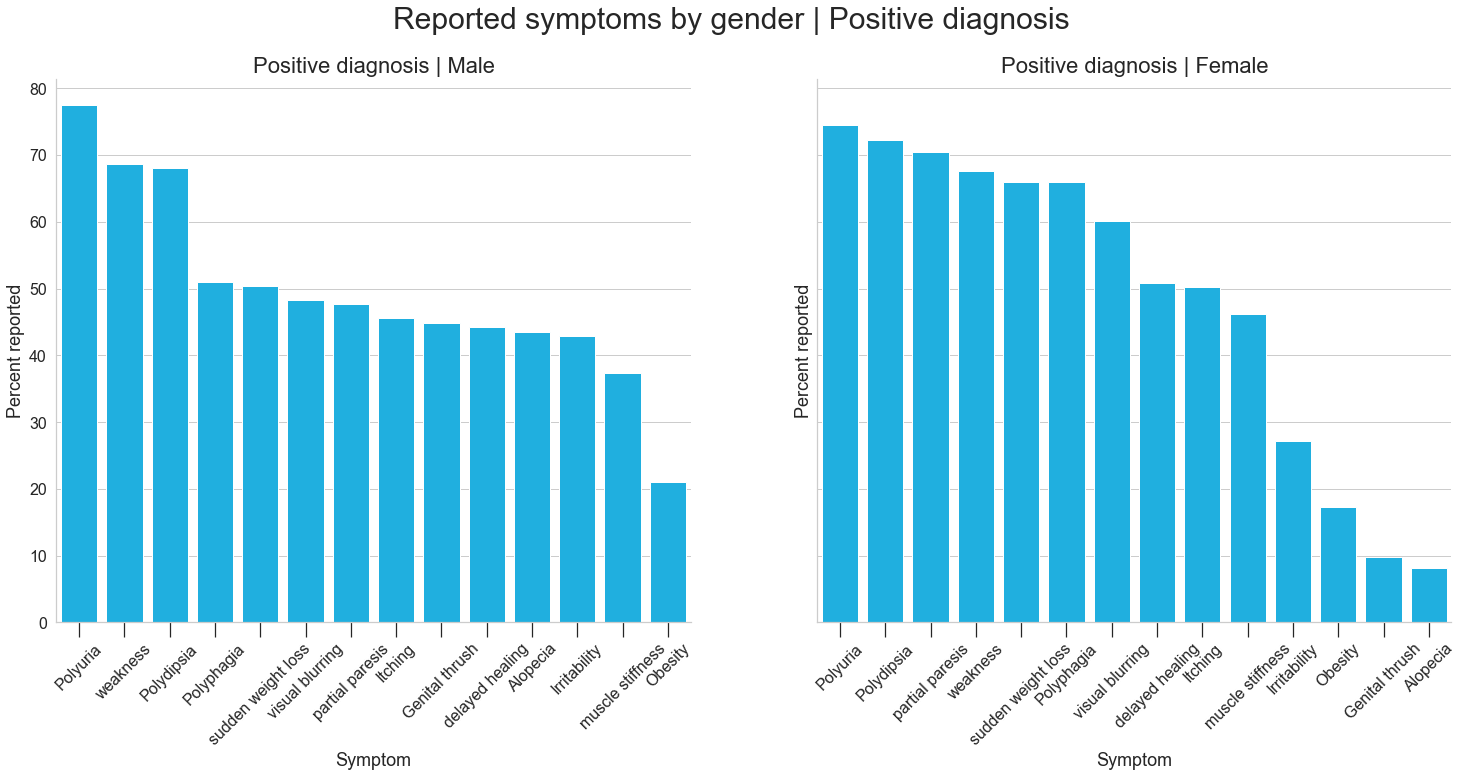

In [36]:
# %age of Reported Symptoms by Gender - Positive Diagnosis
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'lightseagreen']
for x, sum_pos_genders_df in enumerate(sum_pos_genders_dfs):
    sum_pos_genders_df = sum_pos_genders_df.copy()
    sum_pos_genders_df['pct_reported'] = sum_pos_genders_df['Value'] / pos_genders_len_list[x] * 100
    sns.barplot(data=sum_pos_genders_df, x='symptom', y='pct_reported', color='deepskyblue', ci=False, ax=axes[x])
    current_gender = sum_pos_genders_df['Gender'].iloc[0]

    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Percent reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Positive diagnosis | {current_gender}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
    print(sum_pos_genders_df)
   
    
fig.suptitle('Reported symptoms by gender | Positive diagnosis', size=30)
sns.despine()

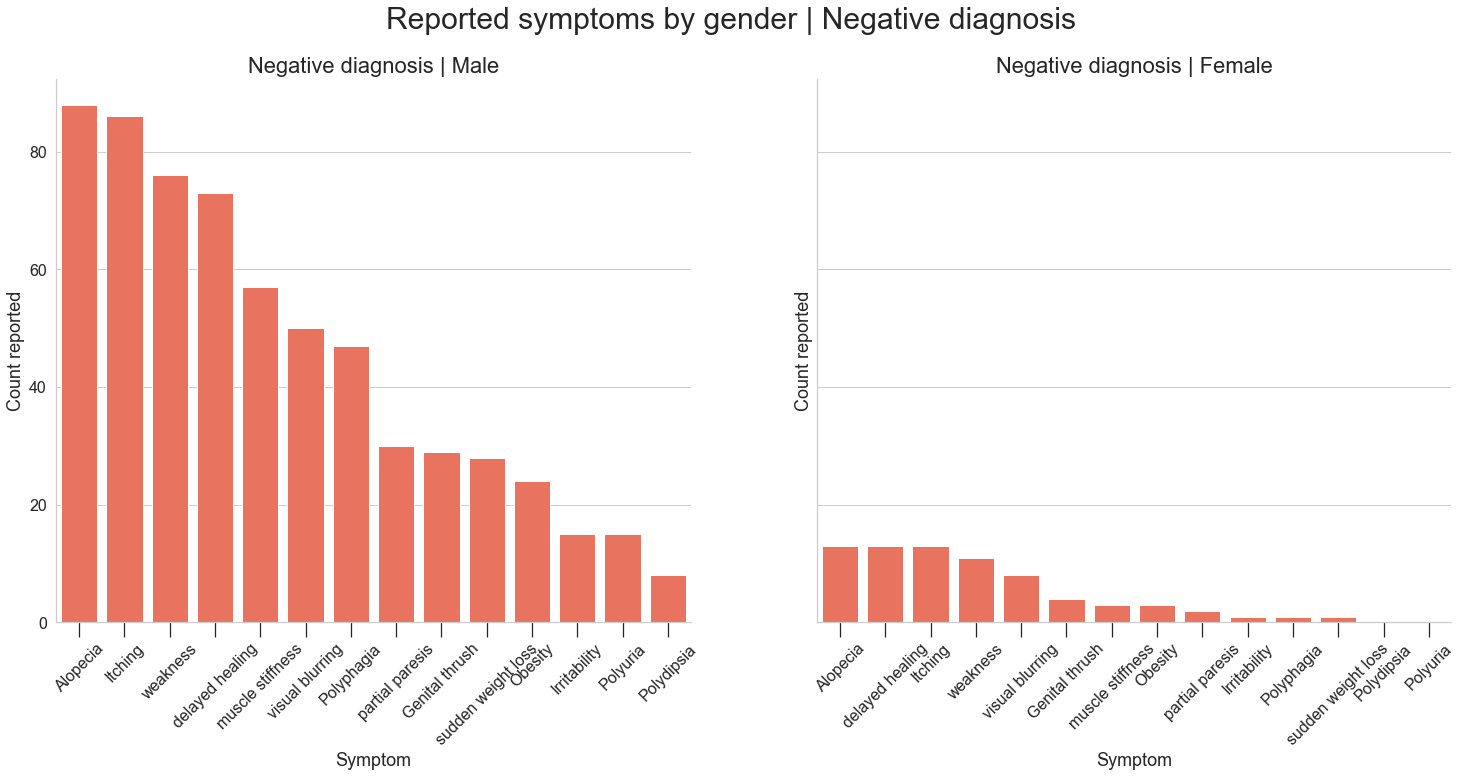

In [37]:
# Reported Symptoms based on Gender - Negative Diagnosis

sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

title_list = ['Male', 'Female']
color_list = ['deepskyblue', 'lightseagreen']
for x, sum_neg_genders_df in enumerate(sum_neg_genders_dfs):
    sns.barplot(data=sum_neg_genders_df, x='symptom', y='Value', color='tomato', ci=False, ax=axes[x])
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count reported",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'Negative diagnosis | {title_list[x]}', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
    
    
fig.suptitle('Reported symptoms by gender | Negative diagnosis', size=30)
sns.despine()

In [38]:
# Grouping result by the Gender and class on the basis of different symptoms 

grouped_df = bool_df.copy()
grouped_df = grouped_df.drop('Age', axis=1)
grouped_df = grouped_df.groupby(['Gender', 'class']).sum().reset_index()
grouped_df

,Gender,class,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Female,Negative,0,0,1,11,1,4,8,13,1,13,2,3,13,3
1,Female,Positive,129,125,114,117,114,17,104,87,47,88,122,80,14,30
2,Male,Negative,15,8,28,76,47,29,50,86,15,73,30,57,88,24
3,Male,Positive,114,100,74,101,75,66,71,67,63,65,70,55,64,31


In [39]:
melt_df = grouped_df.copy()
melt_df = melt_df.melt(id_vars=["Gender", "class"], 
        var_name="symptom", 
        value_name="Value")

melt_df = melt_df.sort_values(by=['Value', 'class'], ascending=False)
print(melt_df.head(15))

    Gender     class             symptom  Value
1   Female  Positive            Polyuria    129
5   Female  Positive          Polydipsia    125
41  Female  Positive     partial paresis    122
13  Female  Positive            weakness    117
3     Male  Positive            Polyuria    114
9   Female  Positive  sudden weight loss    114
17  Female  Positive          Polyphagia    114
25  Female  Positive     visual blurring    104
15    Male  Positive            weakness    101
7     Male  Positive          Polydipsia    100
37  Female  Positive     delayed healing     88
50    Male  Negative            Alopecia     88
29  Female  Positive             Itching     87
30    Male  Negative             Itching     86
45  Female  Positive    muscle stiffness     80


Text(0.5, 1.0, 'Reported symptoms by gender')

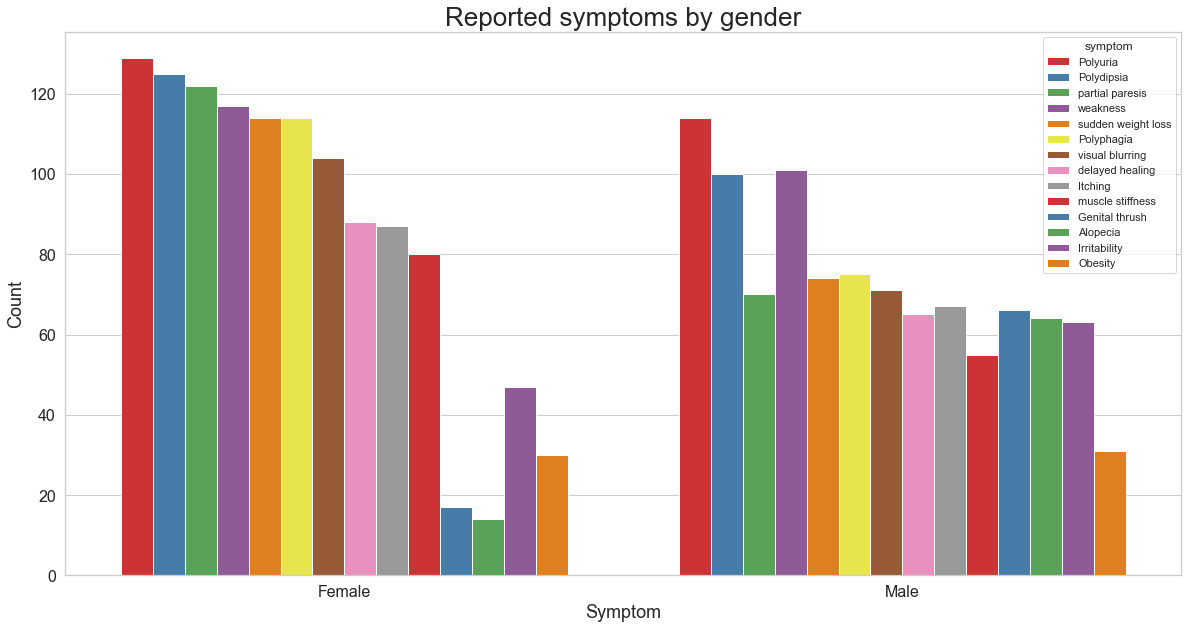

In [40]:
# Bar Graph to plot Reported Symptoms grouped together for all symptoms

sns.set(style='whitegrid')
fig, ax = plt.subplots(1,1, figsize=(20,10))
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)
pos = melt_df.loc[melt_df['class'] == 'Positive']
pos = pos.sort_values(by=['Value'], ascending=False)
sns.barplot(data=pos, x='Gender', y='Value', hue='symptom', palette='Set1', ci=False, ax=ax)
ax.set_xlabel("Symptom", fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
plt.xticks(rotation=0)                                                               


plt.title("Reported symptoms by gender", size=26)

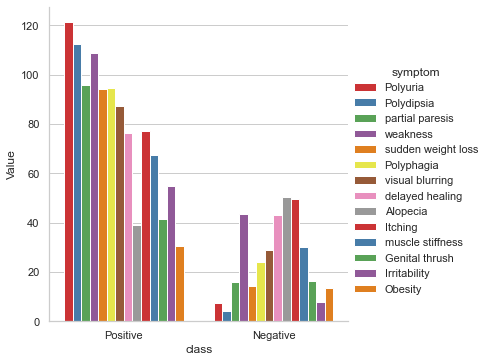

In [41]:
gender_dfs = [melt_df.loc[melt_df['Gender'] == gender] for gender in genders]
# Combined genders
sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)